In [94]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# Create toy data
x = np.linspace(start=0,
                stop=1,
                num=50)
y = 5 * x + 3

In [96]:
print(x)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [97]:
print(y)

[3.         3.10204082 3.20408163 3.30612245 3.40816327 3.51020408
 3.6122449  3.71428571 3.81632653 3.91836735 4.02040816 4.12244898
 4.2244898  4.32653061 4.42857143 4.53061224 4.63265306 4.73469388
 4.83673469 4.93877551 5.04081633 5.14285714 5.24489796 5.34693878
 5.44897959 5.55102041 5.65306122 5.75510204 5.85714286 5.95918367
 6.06122449 6.16326531 6.26530612 6.36734694 6.46938776 6.57142857
 6.67346939 6.7755102  6.87755102 6.97959184 7.08163265 7.18367347
 7.28571429 7.3877551  7.48979592 7.59183673 7.69387755 7.79591837
 7.89795918 8.        ]


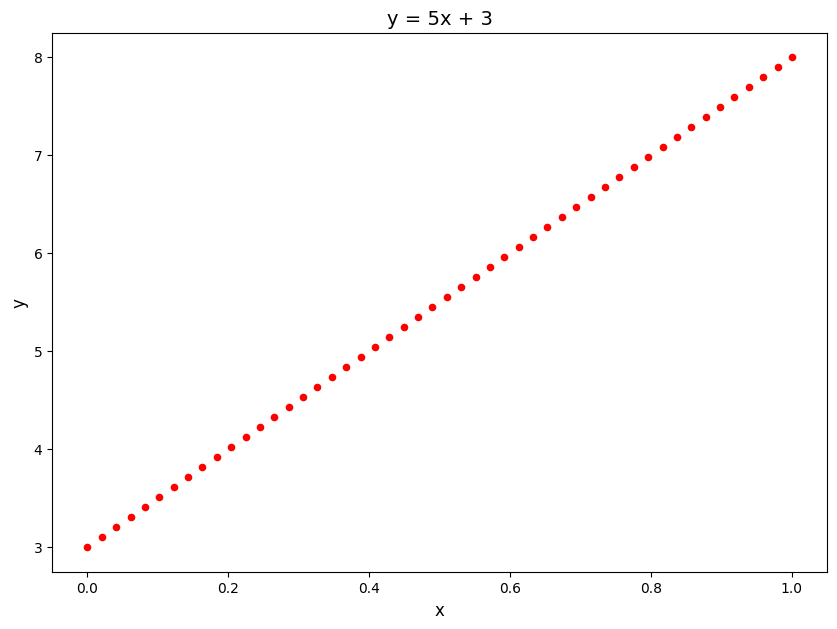

In [98]:
# Plot the toy data
plt.figure(figsize=(10, 7))
plt.scatter(x, y, color='r', s=20)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('y = 5x + 3', fontsize=14)
plt.show()

In [99]:
def plot_datapoints(x: float,
                    y: float,
                    y_pred: float=None):
  """
    This function creates a scatter plot of the data points given by x and y.
    If y_pred is provided, it adds another scatter plot of predicted data points.

    Arguments:
    - x: The x-axis values.
    - y: The y-axis values representing the actual data points.
    - y_pred: The y-axis values representing predicted data points. Defaults to None if not provided.

    Returns:
    - None

    Example usage:
    ```
    plot_datapoints(x_values, y_values, y_predicted_values)
    ```
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(x, y, color='r', s=20)
  if y_pred is not None:
    plt.scatter(x, y_pred, color='g', s=20)
  plt.xlabel('x', fontsize=12)
  plt.ylabel('y', fontsize=12)
  plt.show()

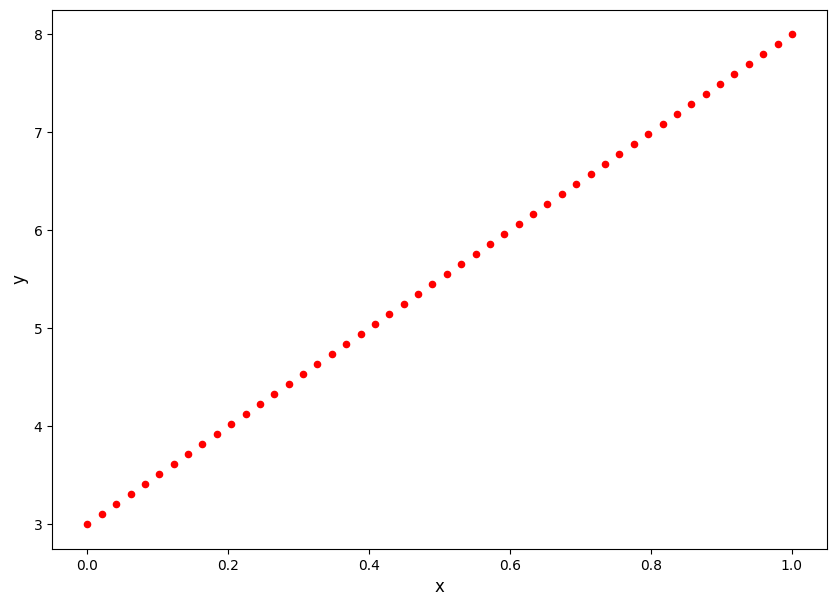

In [100]:
plot_datapoints(x, y)

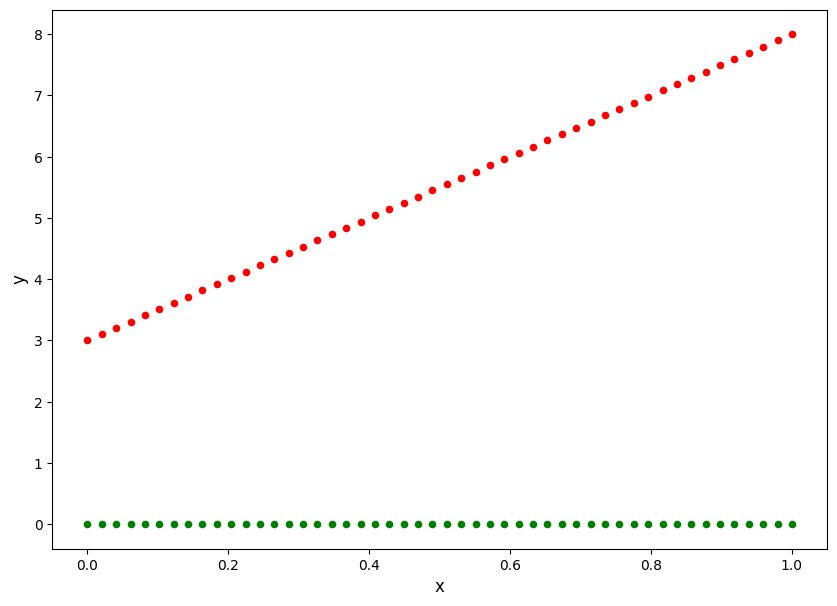

In [101]:
w, b = 0, 0
y_pred = w * x + b

plot_datapoints(x, y, y_pred)

In [102]:
# Calculation of cost
cost= 0
for i in range(len(y)):
  loss = ((y[i] - y_pred[i]) ** 2)
  cost += loss
cost

1620.9183673469386

In [103]:
# Calculation of cost (vectorized implementation)
cost = np.sum((y - y_pred) ** 2)
cost

1620.9183673469388

In [104]:
# Calculation of mean squared error
mse = cost / (2 * len(x))
mse

16.209183673469386

In [105]:
# Calculation of gradient with respect to weight
dJ_dw = 0

for i in range(len(x)):
  dJ_dw += (y_pred[i] - y[i]) * x[i]

dJ_dw = dJ_dw / len(x)
dJ_dw

-3.183673469387754

In [106]:
# Calculation of gradient with respect to bias
dJ_db = 0

for i in range(len(x)):
  dJ_db += (y_pred[i] - y[i])

dJ_db /= len(x)
dJ_db

-5.500000000000001

In [107]:
# Update weight and bias on the basis of previously calculated gradients
learning_rate = 0.01

w -= (learning_rate * dJ_dw)
b -= (learning_rate * dJ_db)
w, b

(0.031836734693877544, 0.05500000000000001)

In [108]:
y_pred = w * x + b
y_pred

array([0.055     , 0.05564973, 0.05629946, 0.05694919, 0.05759892,
       0.05824865, 0.05889838, 0.0595481 , 0.06019783, 0.06084756,
       0.06149729, 0.06214702, 0.06279675, 0.06344648, 0.06409621,
       0.06474594, 0.06539567, 0.0660454 , 0.06669513, 0.06734486,
       0.06799459, 0.06864431, 0.06929404, 0.06994377, 0.0705935 ,
       0.07124323, 0.07189296, 0.07254269, 0.07319242, 0.07384215,
       0.07449188, 0.07514161, 0.07579134, 0.07644107, 0.0770908 ,
       0.07774052, 0.07839025, 0.07903998, 0.07968971, 0.08033944,
       0.08098917, 0.0816389 , 0.08228863, 0.08293836, 0.08358809,
       0.08423782, 0.08488755, 0.08553728, 0.08618701, 0.08683673])

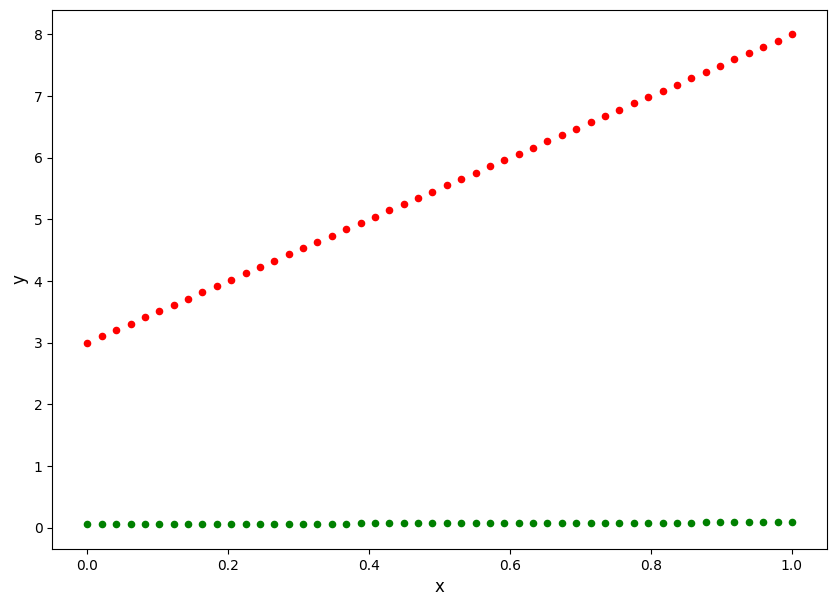

In [109]:
plot_datapoints(x, y, y_pred)

In [110]:
# def weight_gradient(x, y, w, b):
#   num_samples = len(x)
#   y_pred = w * x + b
#   dJ_dw = 0

#   for i in range(num_samples):
#     dJ_dw += (y_pred[i] - y[i]) * x[i]

#   dJ_dw /= num_samples

#   return dJ_dw

In [111]:
def weight_gradient(x, y, w, b):
  """
    Calculate the gradient of the cost function with respect to the weight parameter 'w'.

    Parameters:
    - x (array-like): The input feature values.
    - y (array-like): The true target values.
    - w (float): The weight parameter to compute the gradient for.
    - b (float): The bias parameter.

    This function computes the gradient of the cost function with respect to the weight 'w' for a linear regression model.

    It uses the formula:
        dcost_dw = (1 / num_samples) * sum((y_pred - y) * x)

    where:
    - y_pred = w * x + b is the predicted target values,
    - num_samples is the number of samples in the dataset.

    Arguments:
    - x: Input feature values.
    - y: True target values.
    - w: Weight parameter to compute the gradient for.
    - b: Bias parameter.

    Returns:
    - dcost_dw (float): The gradient of the cost function with respect to 'w'.

    Example usage:
    ```
    gradient = weight_gradient2(x_data, y_data, weight, bias)
    ```

    Note:
    - This function assumes that 'x' and 'y' are numpy arrays or array-like objects.

  """
  num_samples = len(x)
  y_pred = w * x + b

  dcost_dw = np.sum((y_pred - y) * x) / num_samples

  return dcost_dw

In [112]:
def bias_gradient(x, y, w, b):
  """
    Calculate the gradient of the cost function with respect to the bias parameter 'b'.

    Parameters:
    - x (array-like): The input feature values.
    - y (array-like): The true target values.
    - w (float): The weight parameter.
    - b (float): The bias parameter to compute the gradient for.

    This function computes the gradient of the cost function with respect to the bias 'b' for a linear regression model.

    It uses the formula:
        dcost_db = (1 / num_samples) * sum(y_pred - y)

    where:
    - y_pred = w * x + b is the predicted target values,
    - num_samples is the number of samples in the dataset.

    Arguments:
    - x: Input feature values.
    - y: True target values.
    - w: Weight parameter.
    - b: Bias parameter to compute the gradient for.

    Returns:
    - dcost_db (float): The gradient of the cost function with respect to 'b'.

    Example usage:
    ```
    gradient = bias_gradient(x_data, y_data, weight, bias)
    ```

    Note:
    - This function assumes that 'x' and 'y' are numpy arrays or array-like objects.

  """
  num_samples = len(x)
  y_pred = w * x + b

  dcost_db = np.sum(y_pred - y) / num_samples

  return dcost_db

In [113]:
# def bias_gradient(x, y, w, b):
#   num_samples = len(x)
#   y_pred = w * x + b
#   dJ_db = 0

#   for i in range(num_samples):
#     dJ_db += (y_pred[i] - y[i])

#   dJ_db /= num_samples

#   return dJ_db

In [114]:
def mse(x, y, w, b):
  """
    Calculate the Mean Squared Error (MSE) between predicted values and actual values.

    Parameters:
    - x (array-like): The input features.
    - y (array-like): The actual target values.
    - w (float): The weight parameter.
    - b (float): The bias parameter.

    Returns:
    - float: The Mean Squared Error (MSE) between predicted and actual values.

    This function computes the Mean Squared Error (MSE) between the predicted values
    obtained by applying the linear model defined by weight (w) and bias (b) to the input
    features (x), and the actual target values (y). The MSE is calculated as the sum of
    squared differences between predicted and actual values, divided by twice the number
    of samples.
  """
  num_samples = len(x)
  y_pred = w * x + b
  mse = np.sum((y_pred - y) ** 2) / (2 * num_samples) # The 2 in the denominator makes the math a bit more elegant than it already is!

  return mse

[INFO] Initial weight and bias-> w = 0 | b = 0

[INFO] Weight and bias after 500 epochs -> w = 4.91484359709346 | b = 3.0457035879985312



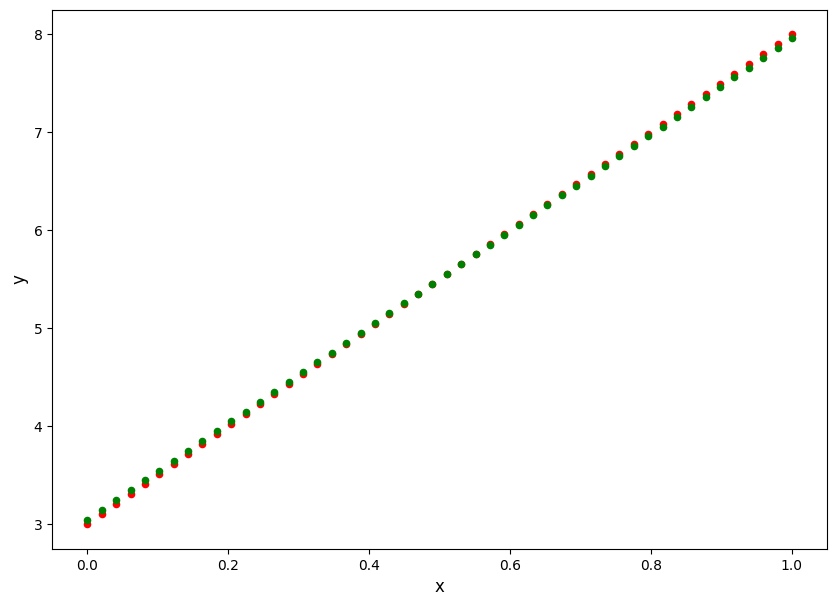

In [115]:
num_epochs = 500
learning_rate = 0.1
w, b = 0, 0
losses = []

print(f"[INFO] Initial weight and bias-> w = {w} | b = {b}\n")

for epoch in range(num_epochs):
  dJ_dw = weight_gradient(x, y, w, b)
  dJ_db = bias_gradient(x, y, w, b)
  losses.append(mse(x, y, w, b))

  w -= (learning_rate * dJ_dw)
  b -= (learning_rate * dJ_db)

print(f"[INFO] Weight and bias after {num_epochs} epochs -> w = {w} | b = {b}\n")

y_pred = w * x + b
plot_datapoints(x, y, y_pred)

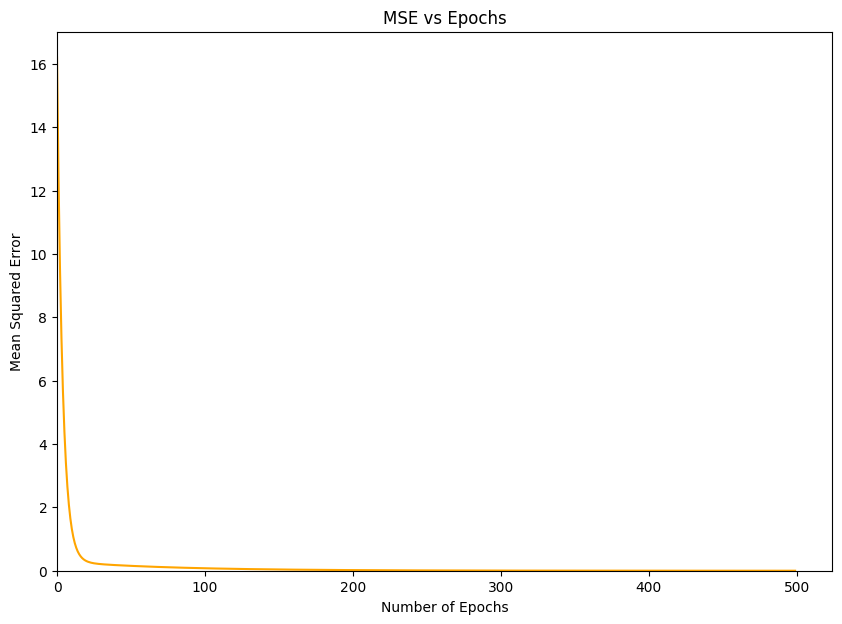

In [116]:
plt.figure(figsize=(10, 7))

plt.plot(range(num_epochs), losses, color='orange')

plt.xlabel('Number of Epochs')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Epochs')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

In [117]:
y_pred = w * x + b

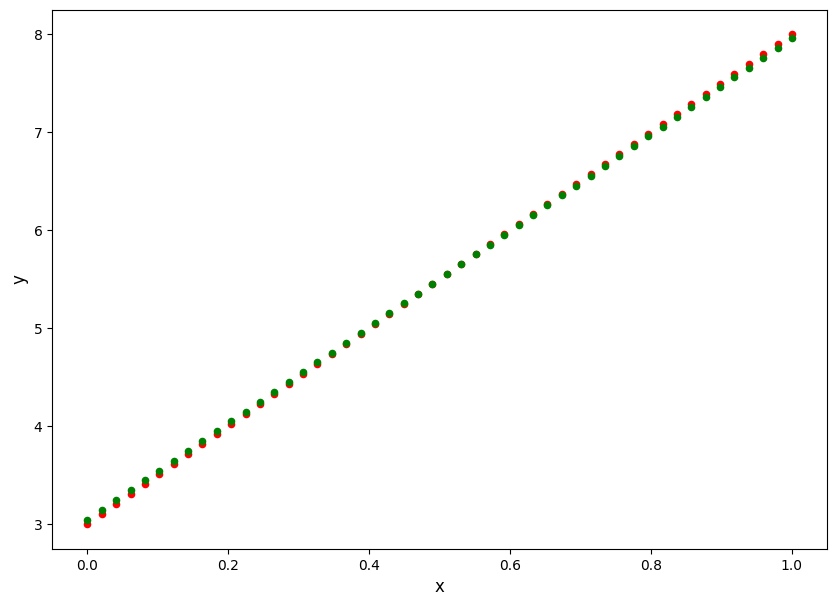

In [118]:
plot_datapoints(x, y, y_pred)

In [119]:
NUM_EPOCHS = 500
learning_rate = 0.1
w, b = 0, 0

print(f"[INFO] Initial weight and bias-> w = {w} | b = {b}\n")
num_samples = len(x)

for epoch in range(NUM_EPOCHS):
  dJ_dw = weight_gradient(x, y, w, b)
  dJ_db = bias_gradient(x, y, w, b)

  w -= (learning_rate * dJ_dw)
  b -= (learning_rate * dJ_db)

print(f"[INFO] Weight and bias after {NUM_EPOCHS} epochs -> w = {w} | b = {b}\n")

[INFO] Initial weight and bias-> w = 0 | b = 0

[INFO] Weight and bias after 500 epochs -> w = 4.91484359709346 | b = 3.0457035879985312



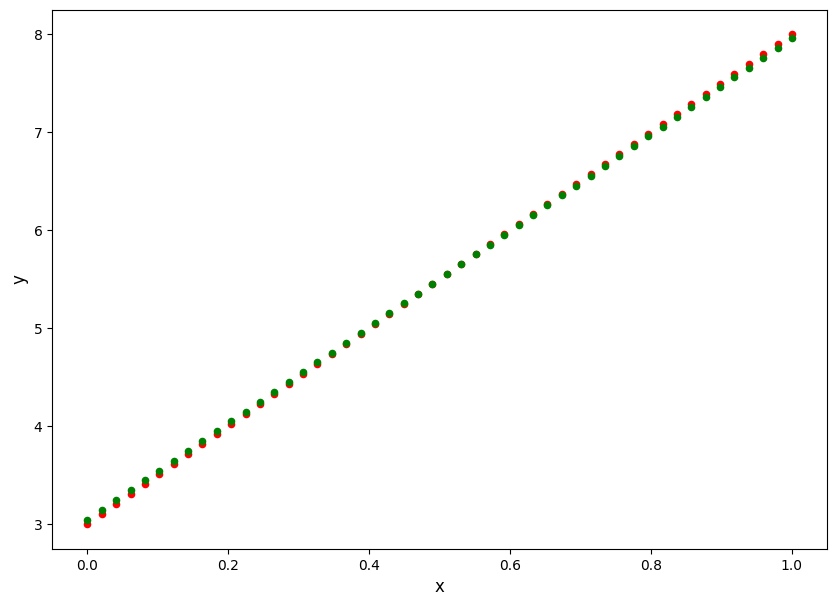

In [120]:
y_pred = w * x + b
plot_datapoints(x, y, y_pred)

In [121]:
# Set x to a constant
x = 2

w_values = np.linspace(start=0, stop=10, num=1000)
b_values = np.linspace(start=0, stop=6, num=1000)

costs = []
for i in range(1000):
  costs.append((5 * x + 3 - (w_values[i] * x + b_values[i])) ** 2)

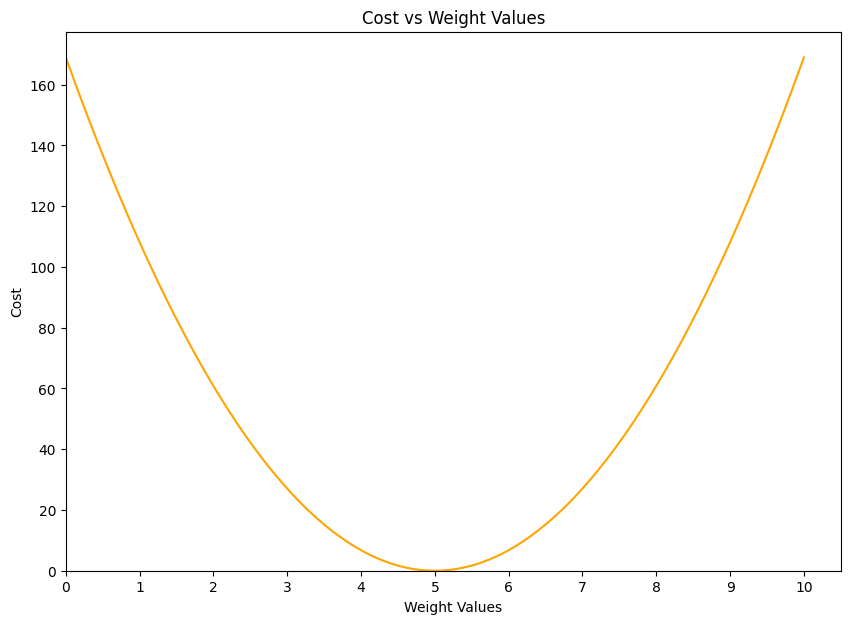

In [122]:
plt.figure(figsize=(10, 7))
plt.plot(w_values, costs, color='orange')
plt.xlabel('Weight Values')
plt.ylabel('Cost')
plt.title('Cost vs Weight Values')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xticks(np.arange(0, 11, 1))
plt.show()

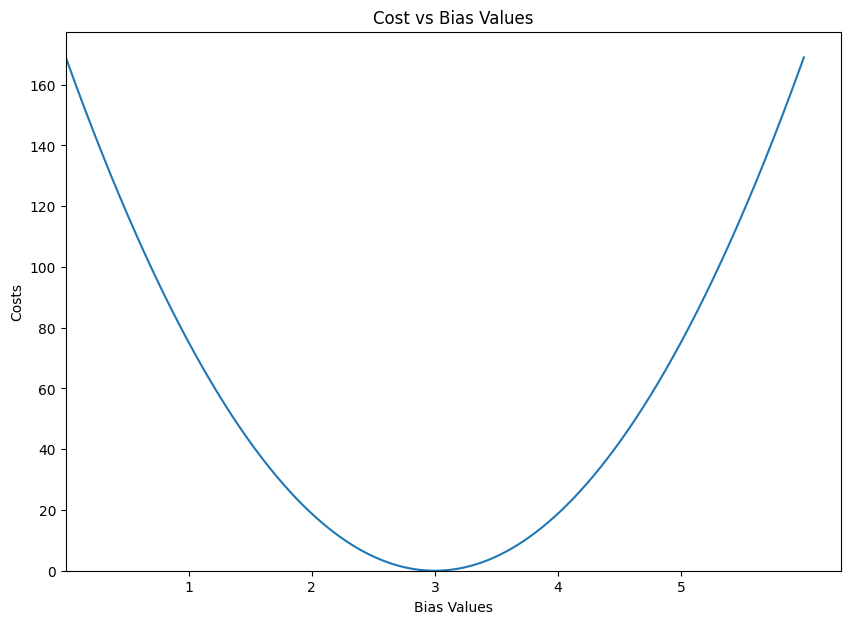

In [123]:
plt.figure(figsize=(10, 7))
plt.plot(b_values, costs)
plt.xlabel('Bias Values')
plt.ylabel('Costs')
plt.title('Cost vs Bias Values')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xticks(np.arange(1, 6, 1))
plt.show()

In [124]:
class LinearRegressionV0():
  """
    Simple Linear Regression model.

    Attributes:
    - learning_rate (float): The learning rate used for gradient descent optimization. Default is 0.1.
    - num_epochs (int): The number of epochs for training the model. Default is 1000.
    - weight (float): The weight parameter of the linear regression model.
    - bias (float): The bias parameter of the linear regression model.
    - costs (list): A list to store the value of the cost function during training.

    Methods:
    - __init__(self, learning_rate=0.1, num_epochs=1000): Initializes the linear regression model with specified learning rate and number of epochs.
    - weight_gradient(self, x, y, w, b): Computes the gradient of the cost function with respect to the weight parameter.
    - bias_gradient(self, x, y, w, b): Computes the gradient of the cost function with respect to the bias parameter.
    - mse(x, y, w, b): Computes the mean squared error (MSE) between the true labels and the predicted labels.
    - fit(self, x, y): Fits the linear regression model to the given training data using gradient descent.
    - loss_curve(self): Plots the loss curve (cost function values) over the training epochs.
    - plot_datapoints(self, x, y): Plots the actual data points and the predicted data points generated by the model.
    - predict(self, x): Predicts the target variable for input data x.
    - get_r2_score(self, x, y): Computes the R-squared (R2) score for the model's predictions.

  """
  def __init__(self, learning_rate=0.1, num_epochs=1000):
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs
    self.weight = np.random.rand()
    self.bias = np.random.rand()
    self.costs = []

  def weight_gradient(self, x, y, w, b):
    y_pred = self.weight * x + self.bias

    dcost_dw = np.mean((y_pred - y) * x)

    return dcost_dw

  def bias_gradient(self, x, y, w, b):
    num_samples = len(x)
    y_pred = self.weight * x + self.bias

    dcost_db = np.mean(y_pred - y)

  def mse(x, y, w, b):
    y_pred = w * x + b
    mse = np.mean((y - y_pred) ** 2)

    return mse

  def fit(self, x, y):
    for epoch_num, epoch in enumerate(range(self.num_epochs)):
      dcost_dw = weight_gradient(x, y, self.weight, self.bias)
      dcost_db = bias_gradient(x, y, self.weight, self.bias)
      self.weight -= (self.learning_rate * dcost_dw)
      self.bias -= (self.learning_rate * dcost_db)
      self.costs.append(mse(x, y, self.weight, self.bias))

      if (epoch_num + 1) % 100 == 0:
        print(f"Epoch: {epoch_num + 1} | MSE: {mse(x, y, self.weight, self.bias)}")

    print(f"After training for {self.num_epochs} epochs -> Weight = {self.weight} | Bias = {self.bias}")

  def loss_curve(self):
    plt.figure(figsize=(10, 7))
    plt.plot(range(len(self.costs)), self.costs, color='orange')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Cost')
    plt.title('Cost vs Number of Epochs')
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.show()

  def plot_datapoints(self, x, y):
    y_pred = self.weight * x + self.bias

    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, color='r', s=20)
    plt.scatter(x, y_pred, color='g', s=20)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title('Actual Data vs Predictions')
    plt.show()

  def predict(self, x):
    y_pred = self.weight * x + self.bias
    return y_pred

  def get_r2_score(self, x, y):
    y_true = y
    y_pred = self.predict(x)

    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)

    return 1 - (numerator / denominator)

In [125]:
x = np.linspace(start=0, stop=1, num=50)
y = 5 * x + 3

model = LinearRegressionV0(num_epochs=500)
model.fit(x, y)

Epoch: 100 | MSE: 0.06680654970487371
Epoch: 200 | MSE: 0.016935748439250282
Epoch: 300 | MSE: 0.0042932852626743345
Epoch: 400 | MSE: 0.0010883663283506406
Epoch: 500 | MSE: 0.00027590555768230193
After training for 500 epochs -> Weight = 4.920849738685589 | Bias = 3.042480081469154


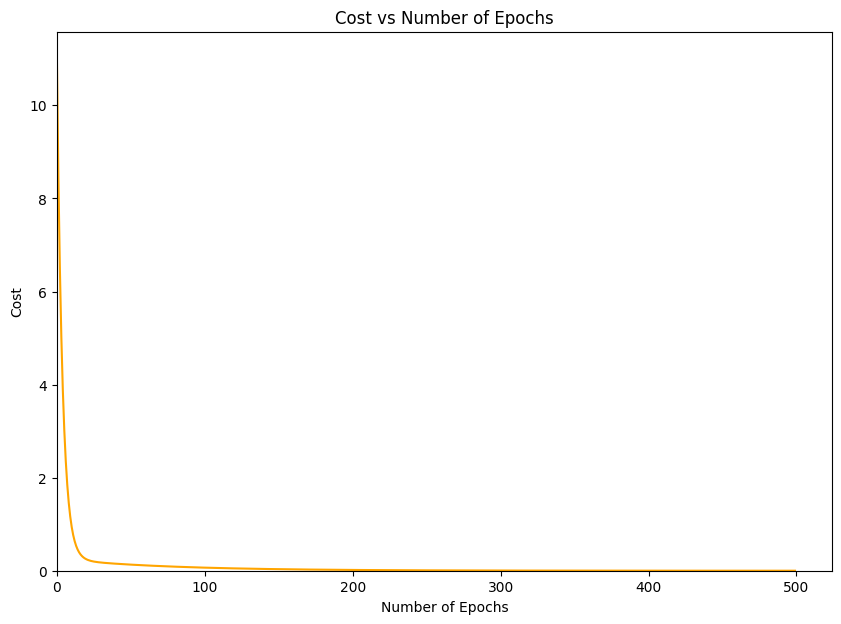

In [126]:
model.loss_curve()

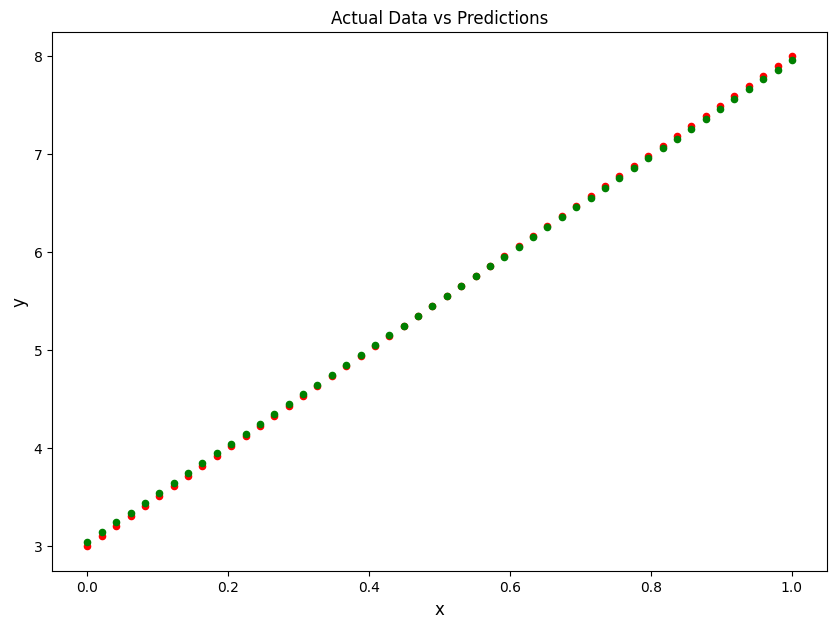

In [127]:
model.plot_datapoints(x, y)

In [128]:
# from sklearn.metrics import r2_score
# print(r2_score(y, model.predict(x)))

print(model.get_r2_score(x, y))

0.9997455176973848


In [129]:
def mse(X, y, w, b):
  """
    Calculate the Mean Squared Error (MSE) between predicted values and actual values.

    Parameters:
    - X (array-like): The input features matrix.
    - y (array-like): The actual target values.
    - w (array-like): The weight parameters.
    - b (float): The bias parameter.

    Returns:
    - float: The Mean Squared Error (MSE) between predicted and actual values.

    This function computes the Mean Squared Error (MSE) between the predicted values
    obtained by applying the linear model defined by weights (w) and bias (b) to the input
    features matrix (X), and the actual target values (y). The MSE is calculated as the mean
    of the squared differences between predicted and actual values.
  """
  y_pred = np.dot(X, w) + b
  return np.mean((y - y_pred) ** 2)

In [130]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate toy data for multiple linear regression
num_samples = 50
num_features = 3

# Generate random features
X = np.random.rand(num_samples, num_features)

# Generate random coefficients for the linear regression equation
true_coefficients = np.random.rand(num_features)

# Generate random noise
noise = np.random.normal(0, 0.1, num_samples)

# Generate target values using the multiple linear regression equation: y = X * true_coefficients + noise
y = np.dot(X, true_coefficients) + noise

# Print the true coefficients
print("True coefficients: ", true_coefficients)

True coefficients:  [0.90826589 0.23956189 0.14489487]


Correlation coefficient between y and x1: 0.8224042276403339


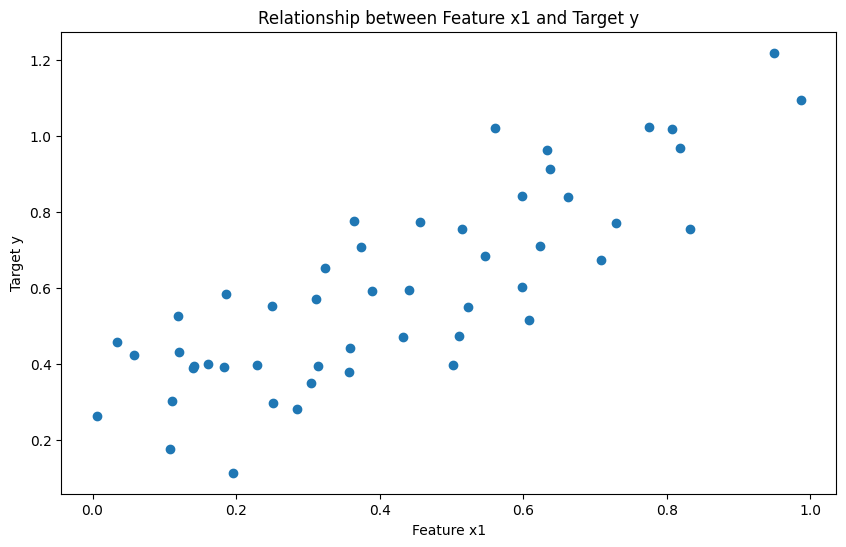

Correlation coefficient between y and x2: 0.5527763069066874


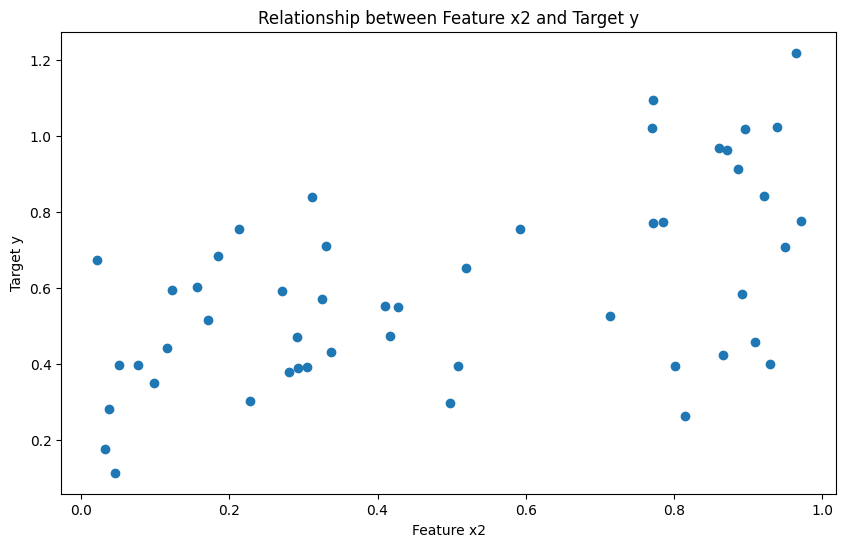

Correlation coefficient between y and x3: -0.058066103346246886


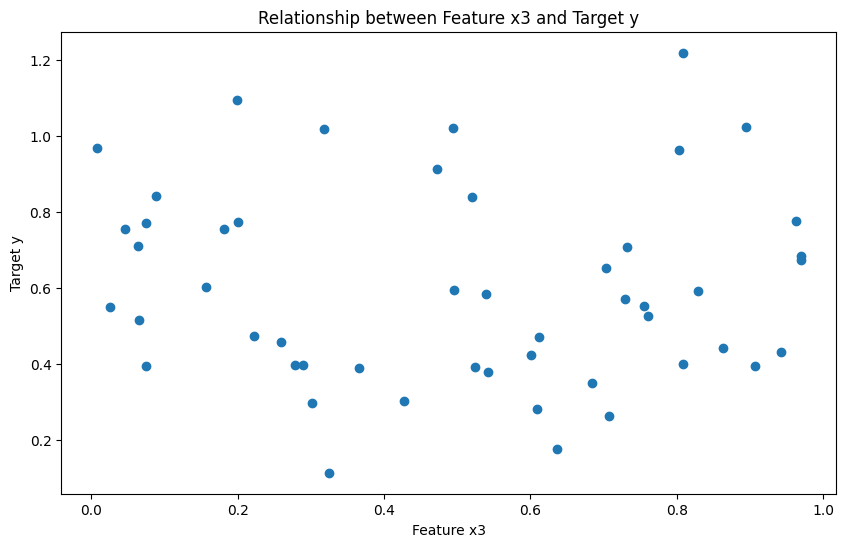

In [131]:
for i in range(num_features):
  plt.figure(figsize=(10, 6))
  plt.scatter(X[:, i], y)
  plt.xlabel(f"Feature x{i+1}")
  plt.ylabel("Target y")
  plt.title(f"Relationship between Feature x{i+1} and Target y")
  print(f"Correlation coefficient between y and x{i+1}: {np.corrcoef(X[:, i], y)[0, 1]}")
  plt.show()

In [133]:
def weight_gradients(X, y, w, b):
    y_pred = np.dot(X, w) +  b

    dcost_dw = np.random.randn(len(w))
    for i in range(len(dcost_dw)):
      dcost_dw[i] = np.mean(((y_pred - y) * X[:, i]))

    return dcost_dw

def bias_gradient(X, y, w, b):
  y_pred = np.dot(X, w) + b
  dcost_db = np.mean(y_pred - y)

  return dcost_db

In [134]:
w = np.random.randn(X.shape[1])
b = np.random.rand()

num_epochs = 2000
costs = []
learning_rate = 0.01
num_features = X.shape[1]

print(f"[INFO] Initial weights and bias: {w}, {b}")
print(f"[INFO] Initial MSE: {mse(X, y, w, b)}")

for epoch in range(num_epochs):
  costs.append(mse(X, y, w, b))

  dcost_dw = weight_gradients(X, y, w, b)
  dcost_db = bias_gradient(X, y, w, b)

  for i in range(num_features):
    w[i] -= (learning_rate * dcost_dw[i])

  b -= (learning_rate * dcost_db)

print(f"[INFO] Weights and bias after training for {num_epochs} epochs: {w}, {b}")
print(f"[INFO] MSE now: {mse(X, y, w, b)}")

[INFO] Initial weights and bias: [ 0.94053558 -0.24538812 -0.75373616], 0.26520236768172545
[INFO] Initial MSE: 0.3001939689050467
[INFO] Weights and bias after training for 2000 epochs: [ 0.76125423  0.22528269 -0.06650447], 0.2047554128101228
[INFO] MSE now: 0.011724071823726583


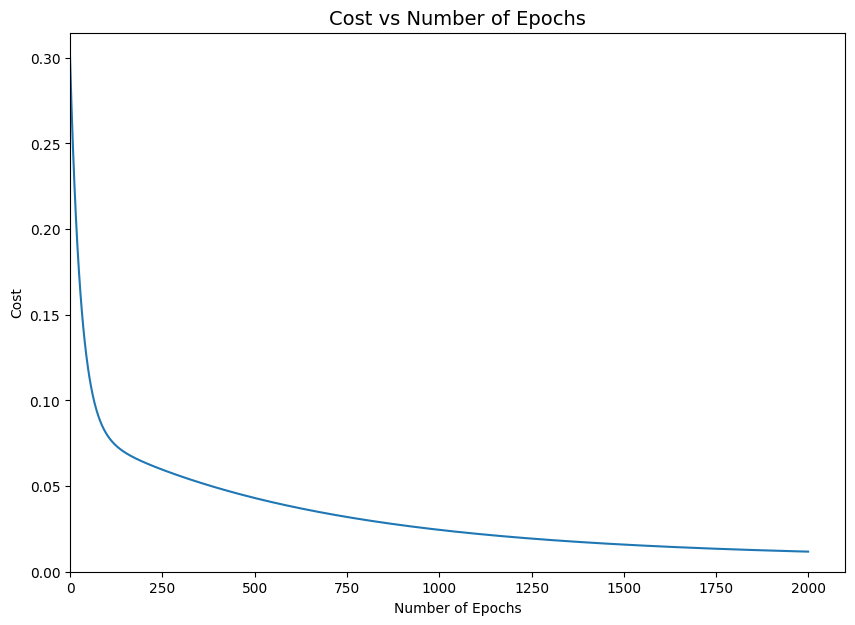

In [135]:
plt.figure(figsize=(10, 7))
plt.plot(range(len(costs)), costs)
plt.xlabel('Number of Epochs', fontsize=10)
plt.ylabel('Cost', fontsize=10)
plt.title('Cost vs Number of Epochs', fontsize=14)
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.show()

In [136]:
from sklearn.metrics import r2_score

y_pred = np.dot(X, w) + b
print(f"R2 score: {r2_score(y_true=y, y_pred=y_pred)}")

R2 score: 0.8159128439147427


In [137]:
def get_r2_score(y_true, y_pred):
  numerator = np.sum((y_true - y_pred) ** 2)
  denominator = np.sum((y_true - np.mean(y_true)) ** 2)

  return 1 - (numerator / denominator)

In [138]:
print(f"R2 score: {get_r2_score(y_true=y, y_pred=y_pred)}")

R2 score: 0.8159128439147427


In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [140]:
w = np.random.randn(X_scaled.shape[1])
b = np.random.rand()

num_epochs = 2000
costs = []
learning_rate = 0.01
num_features = X_scaled.shape[1]

print(f"[INFO] Initial weights and bias: {w}, {b}")
print(f"[INFO] Initial MSE: {mse(X_scaled, y, w, b)}")

for epoch in range(num_epochs):
  costs.append(mse(X_scaled, y, w, b))

  dcost_dw = weight_gradients(X_scaled, y, w, b)
  dcost_db = bias_gradient(X_scaled, y, w, b)

  for i in range(num_features):
    w[i] -= (learning_rate * dcost_dw[i])

  b -= (learning_rate * dcost_db)

print(f"[INFO] Weights and bias after training for {num_epochs} epochs: {w}, {b}")
print(f"[INFO] MSE now: {mse(X_scaled, y, w, b)}")

[INFO] Initial weights and bias: [-0.51044221 -0.37711787 -1.4754114 ], 0.9731447114269086
[INFO] Initial MSE: 2.7297175823637154
[INFO] Weights and bias after training for 2000 epochs: [0.20002072 0.11044486 0.03601414], 0.5971103095584764
[INFO] MSE now: 0.007294791589578718


In [141]:
print(f"R2 score: {r2_score(y_true=y, y_pred=y_pred)}")

R2 score: 0.8159128439147427


In [142]:
print(f"R2 score: {get_r2_score(y_true=y, y_pred=y_pred)}")

R2 score: 0.8159128439147427


In [143]:
class LinearRegressionV1():
  def __init__(self, num_features, learning_rate=0.01, num_epochs=2000):
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs
    self.costs = []
    self.num_features = num_features
    self.weights = np.random.randn(num_features)
    self.bias = np.random.rand()

  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias

    return y_pred

  def weight_gradients(self, X, y):
    y_pred = self.predict(X)

    dcost_dw = np.random.randn(len(w))
    for i in range(len(dcost_dw)):
      dcost_dw[i] = np.mean(((y_pred - y) * X[:, i]))

    return dcost_dw

  def bias_gradient(self, X, y):
    y_pred = self.predict(X)
    dcost_db = np.mean(y_pred - y)

    return dcost_db

  def mse(self, X, y):
    y_pred = self.predict(X)
    mse = np.mean((y_pred - y) ** 2)

    return mse

  def fit(self, X, y):
    for epoch_num, epoch in enumerate(range(self.num_epochs)):
      self.costs.append(self.mse(X, y))
      dcost_dw = self.weight_gradients(X, y)
      dcost_db = self.bias_gradient(X, y)

      for i in range(self.num_features):
        self.weights[i] -= (self.learning_rate * dcost_dw[i])

      self.bias -= (self.learning_rate * dcost_db)

      if (epoch_num + 1) % 100 == 0:
        print(f"Epoch: {epoch_num + 1} | MSE: {self.mse(X, y)}")

    print(f"After training for {self.num_epochs} epochs -> Weight = {self.weights} | Bias = {self.bias}")

  def loss_curve(self):
    plt.figure(figsize=(10, 7))
    plt.plot(range(len(self.costs)), self.costs, color='orange')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Cost')
    plt.title('Cost vs Number of Epochs')
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.show()

  def get_r2_score(self, X, y):
    y_pred = self.predict(X)

    numerator = np.sum((y - y_pred) ** 2)
    denominator = np.sum((y - np.mean(y)) ** 2)

    return 1 - (numerator / denominator)

In [144]:
model = LinearRegressionV1(num_features=3,
                           learning_rate=0.1,
                           num_epochs=2000)

model.fit(X, y)

Epoch: 100 | MSE: 0.04442506284527264
Epoch: 200 | MSE: 0.013018738524613025
Epoch: 300 | MSE: 0.008440996603311936
Epoch: 400 | MSE: 0.007616542120658226
Epoch: 500 | MSE: 0.007412771801195174
Epoch: 600 | MSE: 0.007344565079428621
Epoch: 700 | MSE: 0.0073170750162949915
Epoch: 800 | MSE: 0.007305007153339822
Epoch: 900 | MSE: 0.007299519753060824
Epoch: 1000 | MSE: 0.007296988641013764
Epoch: 1100 | MSE: 0.007295814214001008
Epoch: 1200 | MSE: 0.007295267917584295
Epoch: 1300 | MSE: 0.007295013528199223
Epoch: 1400 | MSE: 0.007294895013123411
Epoch: 1500 | MSE: 0.0072948397878722475
Epoch: 1600 | MSE: 0.007294814051861429
Epoch: 1700 | MSE: 0.007294802057912946
Epoch: 1800 | MSE: 0.0072947964681829135
Epoch: 1900 | MSE: 0.00729479386309191
Epoch: 2000 | MSE: 0.007294792648986269
After training for 2000 epochs -> Weight = [0.79938398 0.33829023 0.12061082] | Bias = 0.03054029585522493


In [145]:
model.get_r2_score(X, y)

0.8854597913443455

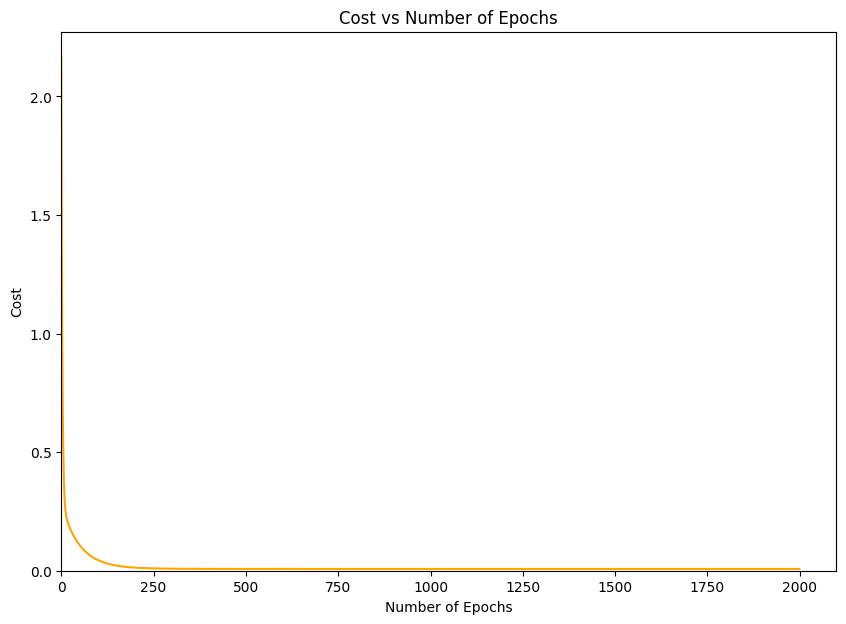

In [146]:
model.loss_curve()